In [1]:
#DATA PREPARATION

import pandas as pd

# Load the dataset
file_path = "C:/Users/BenjaminMaosaMongare/netflix_data.csv"
netflix_df = pd.read_csv(file_path)

# Rename the dataset for ease of reference
netflix_shows_movies = netflix_df.copy()

# View the first few rows to inspect the data
netflix_shows_movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [2]:
# DATA CLEANING

# Check for missing values
missing_values = netflix_shows_movies.isnull().sum()

# Print missing values per column
print("Missing values in the dataset:\n", missing_values)

# Drop rows with missing values or fill them as needed
netflix_shows_movies_cleaned = netflix_shows_movies.dropna()

# Verify that missing values have been addressed
netflix_shows_movies_cleaned.isnull().sum()


Missing values in the dataset:
 show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [3]:
# DATA EXPLORATION

# Get descriptive statistics
netflix_shows_movies_cleaned.describe()

# Data info to understand column types and size
netflix_shows_movies_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 383.3+ KB


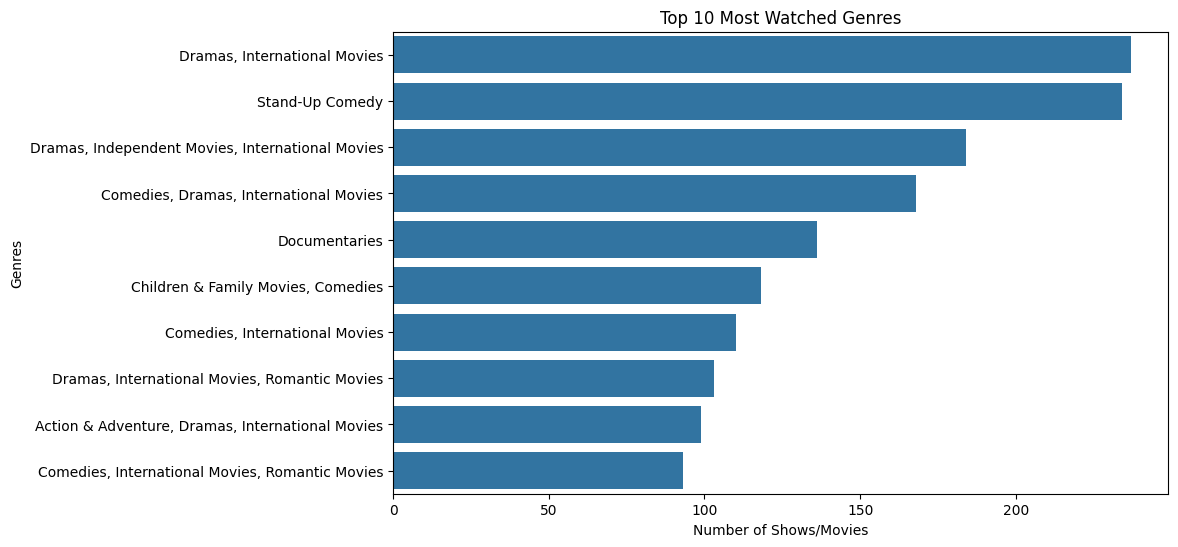

In [5]:
# DATA VISUALIZATION

# a) Most watched movies
import matplotlib.pyplot as plt
import seaborn as sns

# Use the listed_in column for genre
plt.figure(figsize=(10, 6))
genre_count = netflix_shows_movies_cleaned['listed_in'].value_counts().head(10)
sns.barplot(x=genre_count, y=genre_count.index)
plt.title("Top 10 Most Watched Genres")
plt.xlabel("Number of Shows/Movies")
plt.ylabel("Genres")
plt.show()


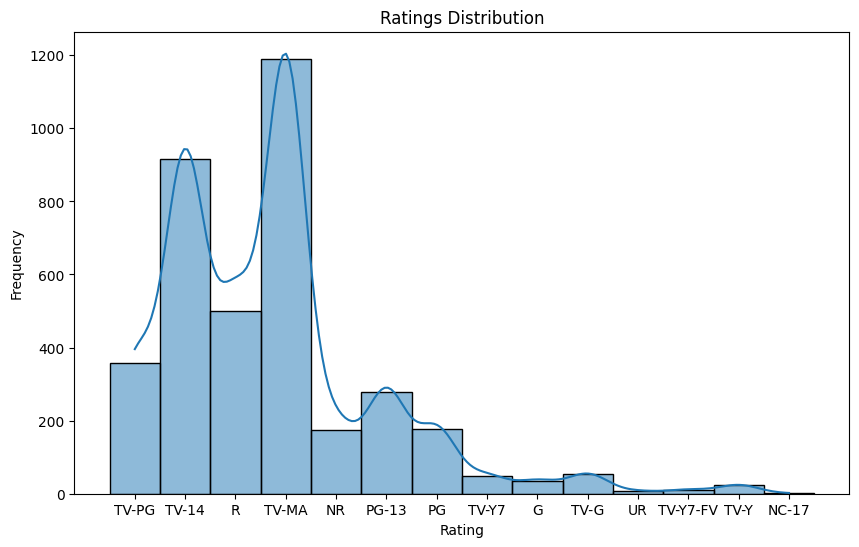

In [6]:
# b) Ratings Distribution

# Use the 'rating' column
plt.figure(figsize=(10, 6))
sns.histplot(netflix_shows_movies_cleaned['rating'], bins=20, kde=True)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [8]:
# EXPORT DATA FOR R

# Export cleaned dataset to CSV
netflix_shows_movies_cleaned.to_csv("C:/Users/BenjaminMaosaMongare/netflix_shows_movies_cleaned.csv", index=False)